In [34]:
from feos.si import *
from feos.eos import *
from feos.uvtheory import *

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_context("talk")
sns.set_palette("Dark2")
sns.set_style("ticks")
colors = sns.color_palette("Dark2", 8)

## **uv-theory for mixtures**
$a = a_d^\text{hs}+\Delta a_0 + \Delta a_1^u + \sum_i \sum_j x_i x_j \psi_{ij}(\Delta B_{2,ij} - \Delta B_{21, ij}^u)$

with Combination Rules

 1.  ArithmetricPhi: $\psi_{ij} = 1 - \phi_{ij}^u$ and $\phi_{ij}^u=0.5(\phi_{ii} + \phi_{jj})$
 2. GeometricPhi: $\psi_{ij} = 1 - \phi_{ij}^u$ and $\phi_{ij}^u=\sqrt{\phi_{ii}  \phi_{jj}}$
 3. GeometricPsi: $\psi_{ij} = \sqrt{(1 - \phi_{ii})(1- \phi_{jj}) }$
 4. OneFluidPsi: $\psi_{ij} = \psi_{x} =1 - \phi_{x}(\rho_x,T_x, m_x)$
 
For geometric averages: Values in the square root must not become negtive!!!

In [35]:
sigma = 1.0
epsilon_k = 1.0

SIGMA3 = (sigma * ANGSTROM)**3
EPSK = epsilon_k * KELVIN
P_RED = EPSK * KB / SIGMA3

parameters = UVParameters.from_lists(
    m=[1.0, 2.0],
    rep=[12.0]*2,
    att=[6.0]*2,
    sigma=[sigma]*2,
    epsilon_k=[epsilon_k]*2
)

uv1 = EquationOfState.uvtheory(parameters, perturbation=Perturbation.BarkerHenderson, combination_rule=CombinationRule.ArithmeticPhi)
uv2 = EquationOfState.uvtheory(parameters, perturbation=Perturbation.BarkerHenderson, combination_rule=CombinationRule.GeometricPhi)
uv3 = EquationOfState.uvtheory(parameters, perturbation=Perturbation.BarkerHenderson, combination_rule=CombinationRule.GeometricPsi)
uv4 = EquationOfState.uvtheory(parameters, perturbation=Perturbation.BarkerHenderson, combination_rule=CombinationRule.OneFluidPsi)

In [36]:
uv1_vles = []
uv2_vles = []
uv3_vles = []
uv4_vles = []

temperatures = [0.8, 1, 1.1, 1.3, 1.4]
for t in temperatures:
    uv1_vles.append(PhaseDiagram.binary_vle(uv1, t*KELVIN, 100))
    uv2_vles.append(PhaseDiagram.binary_vle(uv2, t*KELVIN, 100))
    #uv3_vles.append(PhaseDiagram.binary_vle(uv3, t*KELVIN, 100))
    uv4_vles.append(PhaseDiagram.binary_vle(uv4, t*KELVIN, 100))

In [37]:
deiters_data = pd.read_csv("reference_data/c1_c2.csv")
deiters_data.head()

,t,x1,y1,pv,gamma,rho1_l,rho2_l,rho1_v,rho2_v
0,0.8,0.000,NaN,0.00448,1.001,NaN,0.80116,NaN,0.00580
1,0.8,0.125,0.000175,0.00394,1.081,0.0945,0.63130,9.000000e-07,0.00514
2,0.8,0.250,0.004003,0.00327,1.150,0.1715,0.49150,1.700000e-05,0.00423
3,0.8,0.375,0.004225,0.00257,1.230,0.2352,0.37520,1.400000e-05,0.00330
4,0.8,0.500,0.006955,0.00202,1.300,0.2893,0.27630,1.800000e-05,0.00257


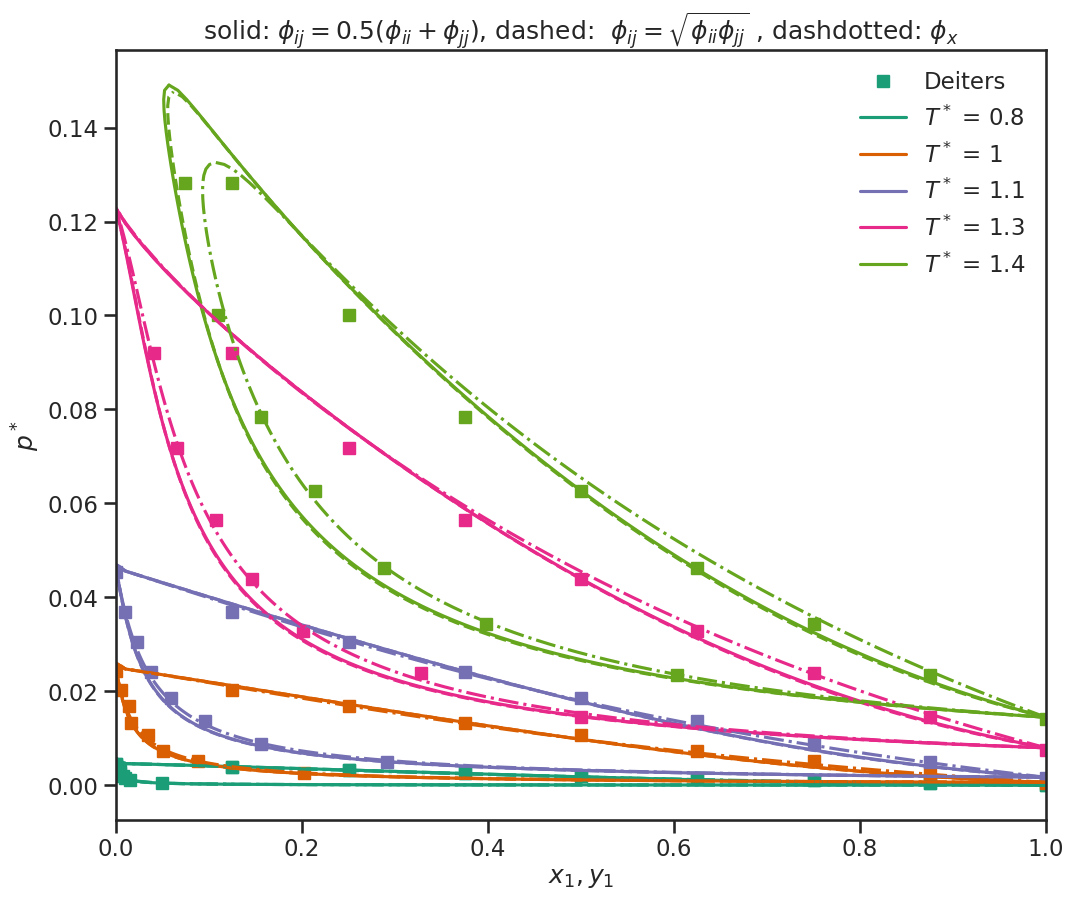

In [38]:
f, ax = plt.subplots(1,1,figsize=(12, 10))

for i, uv_vle in enumerate(uv1_vles):
    dd = deiters_data[deiters_data.t == temperatures[i]]
    if i == 0:
        plt.plot(dd.x1, dd.pv, "s", color=colors[i], label="Deiters")
    plt.plot(dd.x1, dd.pv, "s", color=colors[i])
    plt.plot(dd.y1, dd.pv, "s", color=colors[i])
    
    ax.plot(uv_vle.liquid.molefracs[:,1], uv_vle.liquid.pressure/P_RED, color=colors[i], label=r"$T^*$ = {}".format(temperatures[i]))
    ax.plot(uv_vle.vapor.molefracs[:,1], uv_vle.vapor.pressure/P_RED, color=colors[i])

for i, uv_vle in enumerate(uv2_vles):    
    ax.plot(uv_vle.liquid.molefracs[:,1], uv_vle.liquid.pressure/P_RED, '--', color=colors[i])
    ax.plot(uv_vle.vapor.molefracs[:,1], uv_vle.vapor.pressure/P_RED, '--', color=colors[i])

for i, uv_vle in enumerate(uv4_vles):    
    ax.plot(uv_vle.liquid.molefracs[:,1], uv_vle.liquid.pressure/P_RED, '-.', color=colors[i])
    ax.plot(uv_vle.vapor.molefracs[:,1], uv_vle.vapor.pressure/P_RED, '-.', color=colors[i])
    
ax.set_title('solid: $\\phi_{ij}=0.5(\\phi_{ii} + \\phi_{jj})$, dashed:  $\phi_{ij}=\sqrt{\phi_{ii}  \phi_{jj}}$ , dashdotted: $\phi_x$')
ax.set_xlim(0,1)
ax.set_xlabel('$x_1,y_1$')
ax.set_ylabel('$p^*$')
ax.legend(frameon=False);

Text(0.5, 1.0, 'solid: $\\phi_{ij}=0.5(\\phi_{ii} + \\phi_{jj})$, dashed:  $\\phi_{ij}=\\sqrt{\\phi_{ii}  \\phi_{jj}}$ , dashdotted: $\\phi_x$')

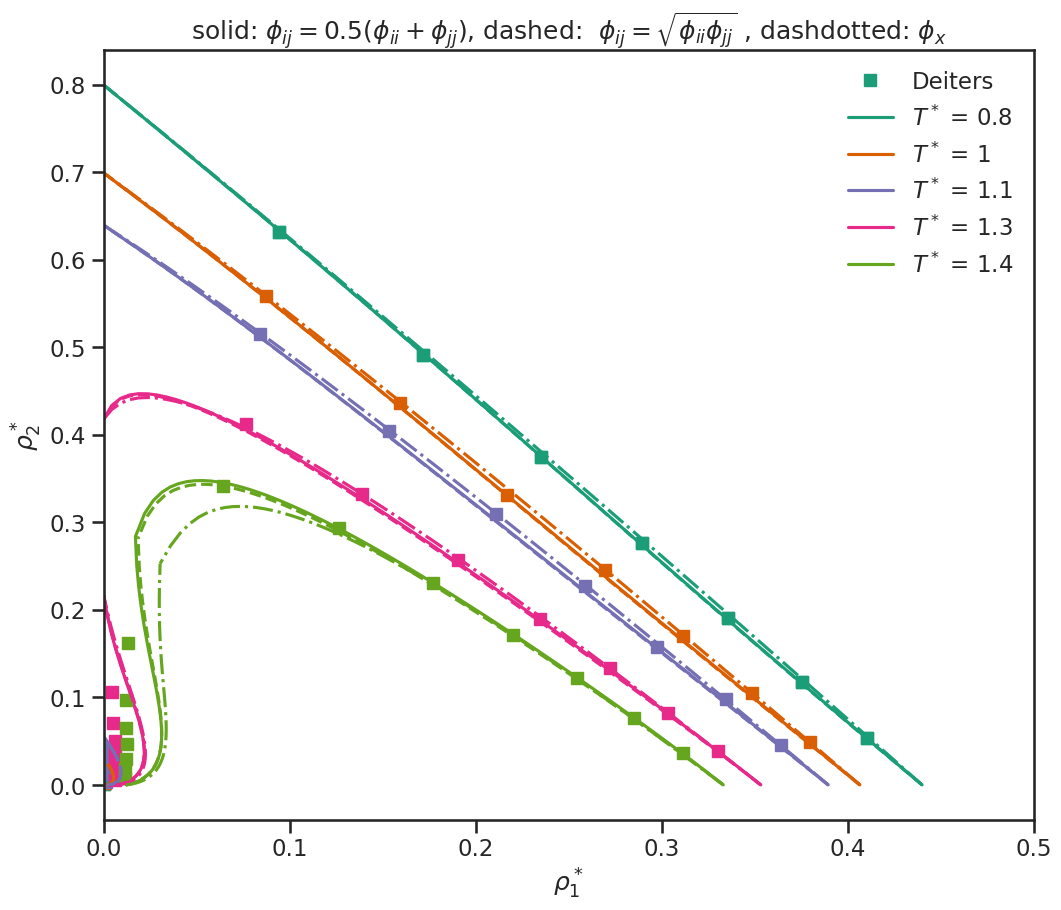

In [43]:
f, ax = plt.subplots(1,1,figsize=(12, 10))

for i, uv_vle in enumerate(uv1_vles):
    dd = deiters_data[deiters_data.t == temperatures[i]]
    if i == 0:
        plt.plot(dd.rho1_l, dd.rho2_l, "s", color=colors[i], label="Deiters")
    plt.plot(dd.rho1_l, dd.rho2_l, "s", color=colors[i])
    plt.plot(dd.rho1_v, dd.rho2_v, "s", color=colors[i])
    
    rhol = uv_vle.liquid.density * SIGMA3 * NAV
    rhov = uv_vle.vapor.density * SIGMA3 * NAV
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhol, uv_vle.liquid.molefracs[:, 0] * rhol, color=colors[i], label=r"$T^*$ = {}".format(temperatures[i]))
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhov, uv_vle.liquid.molefracs[:, 0] * rhov, color=colors[i])
for i, uv_vle in enumerate(uv2_vles):
    rhol = uv_vle.liquid.density * SIGMA3 * NAV
    rhov = uv_vle.vapor.density * SIGMA3 * NAV
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhol, uv_vle.liquid.molefracs[:, 0] * rhol, '--', color=colors[i])
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhov, uv_vle.liquid.molefracs[:, 0] * rhov, '--', color=colors[i])
    
for i, uv_vle in enumerate(uv4_vles):
    rhol = uv_vle.liquid.density * SIGMA3 * NAV
    rhov = uv_vle.vapor.density * SIGMA3 * NAV
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhol, uv_vle.liquid.molefracs[:, 0] * rhol, '-.', color=colors[i])
    ax.plot(uv_vle.liquid.molefracs[:, 1] * rhov, uv_vle.liquid.molefracs[:, 0] * rhov, '-.', color=colors[i])
    
ax.set_xlim(0,0.5)
ax.set_xlabel(r'$\rho_1^*$')
ax.set_ylabel(r'$\rho_2^*$')
ax.legend(frameon=False);
ax.set_title('solid: $\\phi_{ij}=0.5(\\phi_{ii} + \\phi_{jj})$, dashed:  $\phi_{ij}=\sqrt{\phi_{ii}  \phi_{jj}}$ , dashdotted: $\phi_x$')